In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
print("TensorFlow version:", tf.__version__)



TensorFlow version: 2.10.0


In [2]:
img_height = 64
img_width = 64
batch_size = 32

train_dir = '../data/Rice_Image_Dataset_split/train'
val_dir = '../data/Rice_Image_Dataset_split/validation'


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 classes
])


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=2,
    validation_data=val_generator,
    validation_steps=25
)


Epoch 1/2
100/100 [==============================] - 5s 49ms/step - loss: 0.5291 - accuracy: 0.8050 - val_loss: 0.1600 - val_accuracy: 0.9463
Epoch 2/2
100/100 [==============================] - 5s 49ms/step - loss: 0.2223 - accuracy: 0.9241 - val_loss: 0.1238 - val_accuracy: 0.9588


In [7]:
model.save('../model/rice_classifier_model.h5')


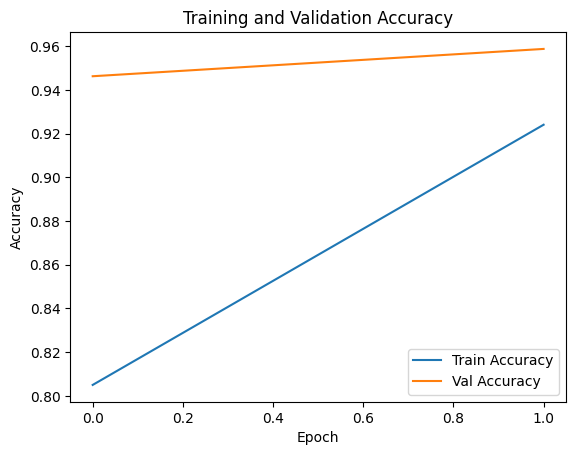

In [8]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
